In [1]:
import json
import hashlib
from datetime import datetime, timedelta

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from data_update.prepare_data import *

In [3]:
json_path = "available_pushes_168hr.json"
with open(json_path, "r") as f:
    pushes = json.load(f)

In [4]:
prev_game_id = ""

# Arguments
interval = 168
window_before = interval
window_after = 1
freq = "10 min"

# Start of for loop
idx = 27
push = pushes[idx]

game_id = push["game_id"]
game_id = int(game_id) if isinstance(game_id, str) else game_id

# inner for loop for T=0, 1
push_date = datetime.datetime.fromisoformat(push["pushTime"]) # T = 1
# push_date = datetime.datetime.fromisoformat(push["pushTime"]) - datetime.timedelta(hours=window_before) # T = 0
start_date = push_date - datetime.timedelta(hours=window_before)
end_date = push_date + datetime.timedelta(hours=window_after)

In [37]:
push

{'pushTime': '2021-12-16 13:56:06',
 'game_id': '2097',
 'author': 'nan',
 'content': '지금 업데이트해서 달라진 검은왕관을 만나보세요!\n수신거부 : 휴대폰 내 설정 → 알림',
 'pushText': 'nan',
 'title': '[광고] 잠재능력 추가 및 마스터리 확장 업데이트 완료!',
 'count_1': '1',
 'count_0': '0',
 'dataPoints_1': 23870,
 'dataPoints_0': 24281}

In [5]:
print(start_date, push_date, end_date)
print(game_id)

2021-12-09 13:56:06 2021-12-16 13:56:06 2021-12-16 14:56:06
2097


In [6]:
login_df = prepare_login_df(
    url="https://search-game-log-73v4ao67bzgafxhgcxse6ue7ou.ap-northeast-2.es.amazonaws.com",
    start_date=start_date,
    end_date=end_date,
    save_path="./data",
    prefix="login",
)

if prev_game_id != game_id:
    crud_by_game_id = prepare_crud_df(
        save_path='./data/crud',
        game_id=game_id,
    )
    prev_game_id = game_id

columns = ["game_id", "gamer_id", "inDate"]

login_df = login_df[columns]
crud_by_game_id = crud_by_game_id[columns]

Login data on 2021-12-09 already in ./data. Load the existing csv file.
Login data on 2021-12-10 already in ./data. Load the existing csv file.
Login data on 2021-12-11 already in ./data. Load the existing csv file.
Login data on 2021-12-12 already in ./data. Load the existing csv file.
Login data on 2021-12-13 already in ./data. Load the existing csv file.
Login data on 2021-12-14 already in ./data. Load the existing csv file.
Login data on 2021-12-15 already in ./data. Load the existing csv file.
Login data on 2021-12-16 already in ./data. Load the existing csv file.
CRUD data file (./data/crud/crud_2097.csv) exists. Load the existing csv file.


In [7]:
login_by_game_id = login_df[login_df["game_id"] == game_id].copy()

login_by_game_id["inDate"] = pd.to_datetime(login_by_game_id["inDate"])
crud_by_game_id["inDate"] = crud_by_game_id["inDate"].apply(lambda x: x[:-1])
crud_by_game_id["inDate"] = pd.to_datetime(crud_by_game_id["inDate"])

login_by_game_id = login_by_game_id[(login_by_game_id["inDate"] >= start_date) & (login_by_game_id["inDate"] <= end_date)]
login_by_game_id["gamer_id"] = login_by_game_id["gamer_id"].apply(lambda x: hashlib.sha256(x.encode()).hexdigest())

crud_by_game_id = crud_by_game_id[(crud_by_game_id["inDate"] >= start_date) & (crud_by_game_id["inDate"] <= end_date)].copy()

In [8]:
login_by_game_id.head()

,game_id,gamer_id,inDate
160282,2097,c8f1668da2f1987e0bb40a7717b0e47676977b1c2ddd60...,2021-12-09 13:56:08
160539,2097,7180570f42e64cd2e7817ffc59df0c5425bc4a157951fc...,2021-12-09 13:56:39
160569,2097,7180570f42e64cd2e7817ffc59df0c5425bc4a157951fc...,2021-12-09 13:56:41
160575,2097,6a27a3e907a8220b1647be7aec3e3567bcbe52f36e20d0...,2021-12-09 13:56:41
160580,2097,6a27a3e907a8220b1647be7aec3e3567bcbe52f36e20d0...,2021-12-09 13:56:43


In [9]:
crud_by_game_id.head()

,game_id,gamer_id,inDate
95104,2097,6ebc81d463d1e2cfd62423228621e134a51fcbae0321e6...,2021-12-10 22:52:33.351
95105,2097,6ebc81d463d1e2cfd62423228621e134a51fcbae0321e6...,2021-12-10 22:52:33.993
95106,2097,cdc7c11b9c9f2178feecfc59ed77fb4976f2dddc15e962...,2021-12-10 22:52:34.069
95107,2097,abefc7fbccaeb88c2f295490559d5b086db92ce8c3bd8d...,2021-12-10 22:52:34.115
95108,2097,abefc7fbccaeb88c2f295490559d5b086db92ce8c3bd8d...,2021-12-10 22:52:34.209


In [10]:
len(login_by_game_id), len(crud_by_game_id)

(52360, 2683554)

In [11]:
login_by_game_id["type"] = "login"
crud_by_game_id["type"] = "crud"

In [12]:
login_by_game_id.head()

,game_id,gamer_id,inDate,type
160282,2097,c8f1668da2f1987e0bb40a7717b0e47676977b1c2ddd60...,2021-12-09 13:56:08,login
160539,2097,7180570f42e64cd2e7817ffc59df0c5425bc4a157951fc...,2021-12-09 13:56:39,login
160569,2097,7180570f42e64cd2e7817ffc59df0c5425bc4a157951fc...,2021-12-09 13:56:41,login
160575,2097,6a27a3e907a8220b1647be7aec3e3567bcbe52f36e20d0...,2021-12-09 13:56:41,login
160580,2097,6a27a3e907a8220b1647be7aec3e3567bcbe52f36e20d0...,2021-12-09 13:56:43,login


In [13]:
crud_by_game_id.head()

,game_id,gamer_id,inDate,type
95104,2097,6ebc81d463d1e2cfd62423228621e134a51fcbae0321e6...,2021-12-10 22:52:33.351,crud
95105,2097,6ebc81d463d1e2cfd62423228621e134a51fcbae0321e6...,2021-12-10 22:52:33.993,crud
95106,2097,cdc7c11b9c9f2178feecfc59ed77fb4976f2dddc15e962...,2021-12-10 22:52:34.069,crud
95107,2097,abefc7fbccaeb88c2f295490559d5b086db92ce8c3bd8d...,2021-12-10 22:52:34.115,crud
95108,2097,abefc7fbccaeb88c2f295490559d5b086db92ce8c3bd8d...,2021-12-10 22:52:34.209,crud


In [14]:
logs_by_game_id = pd.concat([login_by_game_id, crud_by_game_id], axis=0, ignore_index=True)
# data = data.sort_values(["inDate", "gamer_id", "type"])
# 여기서 이루어질 필요가 없고, 각 gamer_id별로 이루어져도 무관함!
# 데이터가 커서 전체 정렬에 2분정도가 소요됨
logs_by_game_id = logs_by_game_id.reset_index(drop=True)
logs_by_game_id = pd.concat([logs_by_game_id, pd.get_dummies(logs_by_game_id["type"])], axis=1)

In [15]:
gamer_ids = logs_by_game_id["gamer_id"].unique().tolist()
len(gamer_ids)

4481

In [16]:
gamer_ids = pd.concat([login_by_game_id["gamer_id"], crud_by_game_id["gamer_id"]], axis=0)
gamer_ids = gamer_ids.unique().tolist()
len(gamer_ids)

4481

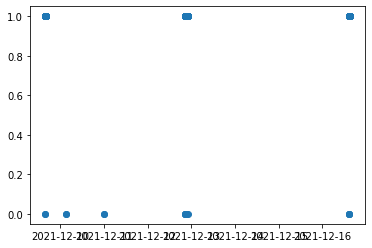

In [18]:
# starting 3rd level for loop
gamer_id = gamer_ids[199]

logs_by_gamer_id = logs_by_game_id[logs_by_game_id["gamer_id"] == gamer_id]
plt.plot(logs_by_gamer_id["inDate"], logs_by_gamer_id["crud"], "o")

In [33]:
bins = pd.date_range(start=start_date, end=end_date, freq=freq)

login_by_gamer_id = login_by_game_id[login_by_game_id["gamer_id"] == gamer_id]
crud_by_gamer_id = crud_by_game_id[crud_by_game_id["gamer_id"] == gamer_id]

login_cut = pd.cut(login_by_gamer_id["inDate"], bins=bins, right=False)
crud_cut = pd.cut(crud_by_gamer_id["inDate"], bins=bins, right=False)

login_cut = login_cut.value_counts().sort_index()
crud_cut = crud_cut.value_counts().sort_index()

cuts = pd.concat([login_cut, crud_cut], axis=1)
cuts.columns = ["login", "crud"]
cuts.index = [item.left for item in cuts.index]
cuts

,login,crud
2021-12-09 13:56:06,0,0
2021-12-09 14:06:06,0,0
2021-12-09 14:16:06,0,0
2021-12-09 14:26:06,0,0
2021-12-09 14:36:06,0,0
...,...,...
2021-12-16 14:06:06,0,0
2021-12-16 14:16:06,0,0
2021-12-16 14:26:06,0,0
2021-12-16 14:36:06,0,0


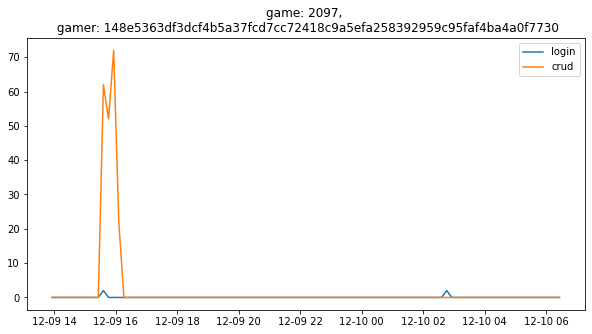

In [36]:
from_idx = 0
to_idx = 100

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(cuts.index[from_idx:to_idx], cuts["login"][from_idx:to_idx], label="login")
plt.plot(cuts.index[from_idx:to_idx], cuts["crud"][from_idx:to_idx], label="crud")
plt.legend()
plt.title(f"game: {game_id}, \n gamer: {gamer_id}")
plt.show()